# <center>Optimization of Hyperparameters in a Convolution Neural Network </center>

<center>by Cecilie Dura André</center>
<center>andrecec@msu.edu</center>


In the last couple of years, there has been a major shift in training and using convolutional neural networks (CNN) as a second opinion in medical detection and diagnostic. It has been proven in some medical cases that the neural networks outperform the detectors. Thus, they are thought to be able to work as a second opinion to minimize the time used on detecting and diagnosing a patient, while increasing sensitivity and specificity. 

Convolution neural networks can be trained by fitting the network of weights iteratively to a wished outcome by a known input. For each convolution neural networks, a few hyperparameters have to be picked. These parameters are often chosen before training and they are not changed under training. These parameters are picked based on experience and retraining the model a couple of times. This project will look into finding a method, either grid search or adaptive selection, to choose the hyperparameters while training the model. Thus, retraining the model is no longer necessary. The optimization algorithm will be used in a future convolution neural network trained on medical data. 

---


<img src="https://miro.medium.com/max/1400/1*PhKGj_bZlND8IEfII426wA.png" width="50%">

<p style="text-align: right;">Image from: https://towardsdatascience.com/shallow-understanding-on-bayesian-optimization-324b6c1f7083 </p>


Bayesian Optimization (BO) is a methods to maximize the evaluating of "black box" functions, this could be Machine Learning or Deep Learning algorithms, without having acces to these algorithms. Thus, BO takes the algorithm and test it at a sequence of test points to determine the optimal values for e.g. hyperparamters. 

This is done by approximations, since we cannot solve the problem analyticly. The approximation is a surregate model (a probabilistic model) based om the results with the associated hyperparameter. Here, a Gaussian model is fitted to the outcome. This will give us a mean and the standard deviation (posterior mean and standard uncertainty). An acquisition function is then  used to look at different trade-offs of picking known maximas and explore uncertain locations  in the hyperparamter space. These steps are iterated, thus we should get a better and better approximation until the maximum number of iterations is met. The best results can then be found with the respictive hyperparameter(s). 

In this project the module called Ax (Adaptive Experimentation Platform) is used to perform BO in Python. The results could look like this

<img src="images/renderplot.png" />

Here we have the results of a couple of samples with the respective means and standard error for different values of momuntum and learning rate (lr). So we ind the end can pick the best hyperparameters for the CNN. Depeding on the optimization algorithm used a width range of parameters can be searched for. This could be: Learning rate, momentum, weight decay, epsilon, and rho - even the numper of epochs can be optimized.  In our case we only used BO to find the learning rate because it was faster than finding more hyperparameters. This was done ten times and the mean and standard deviation of the accuracy for each epoch for plotted. It was compared to the accuracy for running the CNN withouth hyperparameter optimization (HO) over ten times. Here the mean and standard deviation of the accuracy for each epoch where also calculated. The results can be seen here below. 

In [44]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

TESTHO, TRAINHO, VALIDHO, COSTHO = [], [], [], []
TEST, TRAIN, VALID, COST = [], [], [], []


for root, dirs, files in os.walk("./results"):
    for file in files:
        if "Test" in file:
            if "HO" in file:
                TESTHO.append(np.load(os.path.join(root, file)))
            else:
                TEST.append(np.load(os.path.join(root, file)))
        if "Train" in file:
            if "HO" in file:
                if "cost" in file:
                    COSTHO.append(np.load(os.path.join(root, file)))
                else:
                    TRAINHO.append(np.load(os.path.join(root, file)))
            else:
                if "cost" in file:
                    COST.append(np.load(os.path.join(root, file)))
                else:
                    TRAIN.append(np.load(os.path.join(root, file)))
        if "Valid" in file:
            if "HO" in file:
                VALIDHO.append(np.load(os.path.join(root, file)))
            else:
                VALID.append(np.load(os.path.join(root, file)))


                
TESTHO = np.array(TESTHO)
TRAINHO = np.array(TRAINHO)
VALIDHO = np.array(VALIDHO)
COSTHO = np.array(COSTHO)

TEST = np.array(TEST)
TRAIN = np.array(TRAIN)
VALID = np.array(VALID)
COST = np.array(COST)

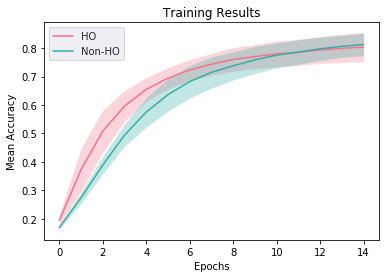

In [45]:
# Ploting training accuracy 

TRAINHO_MEAN = np.mean(TRAINHO, axis = 0)
TRAINHO_STD = np.std(TRAINHO, axis = 0)
TRAIN_MEAN = np.mean(TRAIN, axis = 0)
TRAIN_STD = np.std(TRAIN, axis = 0)

MEAN = np.array([TRAINHO_MEAN, TRAIN_MEAN])
STD = np.array([TRAINHO_STD, TRAIN_STD])
LALBEL = ["HO","Non-HO"]

fig, ax = plt.subplots()
clrs = sns.color_palette("husl", 2)
with sns.axes_style("darkgrid"):
    epochs = list(range(15))
    for i in range(2):
        meanst = np.array(MEAN[i,:], dtype=np.float64)
        sdt = np.array(STD[i,:], dtype=np.float64)
        ax.plot(epochs, meanst, label=LALBEL[i], c=clrs[i])
        ax.fill_between(epochs, meanst-sdt, meanst+sdt ,alpha=0.3, facecolor=clrs[i])
    ax.legend()
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Mean Accuracy")
    ax.set_title("Training Results")


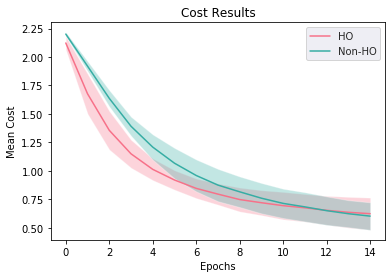

In [46]:
# Ploting the cost 

COSTHO_MEAN = np.mean(COSTHO, axis = 0)
COSTHO_STD = np.std(COSTHO, axis = 0)
COST_MEAN = np.mean(COST, axis = 0)
COST_STD = np.std(COST, axis = 0)

MEAN = np.array([COSTHO_MEAN, COST_MEAN])
STD = np.array([COSTHO_STD, COST_STD])
LALBEL = ["HO","Non-HO"]

fig, ax = plt.subplots()
clrs = sns.color_palette("husl", 2)
with sns.axes_style("darkgrid"):
    epochs = list(range(15))
    for i in range(2):
        meanst = np.array(MEAN[i,:], dtype=np.float64)
        sdt = np.array(STD[i,:], dtype=np.float64)
        ax.plot(epochs, meanst, label=LALBEL[i], c=clrs[i])
        ax.fill_between(epochs, meanst-sdt, meanst+sdt ,alpha=0.3, facecolor=clrs[i])
    ax.legend()
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Mean Cost")
    ax.set_title("Cost Results")

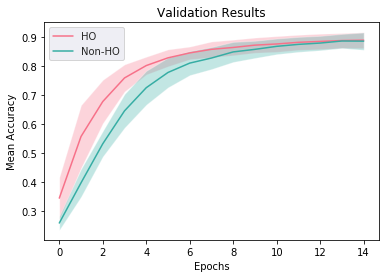

In [47]:
# Ploting validation accuracy 

VALIDHO_MEAN = np.mean(VALIDHO, axis = 0)
VALIDHO_STD = np.std(VALIDHO, axis = 0)
VALID_MEAN = np.mean(VALID, axis = 0)
VALID_STD = np.std(VALID, axis = 0)

MEAN = np.array([VALIDHO_MEAN, VALID_MEAN])
STD = np.array([VALIDHO_STD, VALID_STD])
LALBEL = ["HO","Non-HO"]

fig, ax = plt.subplots()
clrs = sns.color_palette("husl", 2)
with sns.axes_style("darkgrid"):
    epochs = list(range(15))
    for i in range(2):
        meanst = np.array(MEAN[i,:], dtype=np.float64)
        sdt = np.array(STD[i,:], dtype=np.float64)
        ax.plot(epochs, meanst, label=LALBEL[i], c=clrs[i])
        ax.fill_between(epochs, meanst-sdt, meanst+sdt ,alpha=0.3, facecolor=clrs[i])
    ax.legend()
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Mean Accuracy")
    ax.set_title("Validation Results")


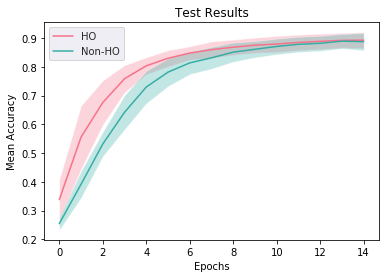

In [48]:
# Ploting test accuracy 

TESTHO_MEAN = np.mean(TESTHO, axis = 0)
TESTHO_STD = np.std(TESTHO, axis = 0)
TEST_MEAN = np.mean(TEST, axis = 0)
TEST_STD = np.std(TEST, axis = 0)

MEAN = np.array([TESTHO_MEAN, TEST_MEAN])
STD = np.array([TESTHO_STD, TEST_STD])
LALBEL = ["HO","Non-HO"]

fig, ax = plt.subplots()
clrs = sns.color_palette("husl", 2)
with sns.axes_style("darkgrid"):
    epochs = list(range(15))
    for i in range(2):
        meanst = np.array(MEAN[i,:], dtype=np.float64)
        sdt = np.array(STD[i,:], dtype=np.float64)
        ax.plot(epochs, meanst, label=LALBEL[i], c=clrs[i])
        ax.fill_between(epochs, meanst-sdt, meanst+sdt ,alpha=0.3, facecolor=clrs[i])
    ax.legend()
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Mean Accuracy")
    ax.set_title("Test Results")


Here it can be seen for both train -, validation -, annd test results that the network with hyperparameter optimization gets results faster, both after 10 epochs the HO CNN and Non-HO CNN lookes similar in mean and accuracy. We have to remember that the CNN used in this paper is small, thus there is a limit to its accuracy. HO does show promising results since the same results are achieved with fewer epochs than the CNN wit non-HO. Therefore, with bigger networks and with more hyperparameters, time can be saved in the length and with equal or better results. 


---
# References

Citing: https://mlconf.com/blog/lets-talk-bayesian-optimization/